* analizar imagenes 

In [1]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
espacioTrabajo = os.getcwd()

In [2]:
class Imagen:
    nombre = None  # Nombre archivo de la imagen
    ubicacion = None  # Direccion en la que se halla la imagen
    matriz_bytes = None  # Matriz de numpy que contiene bytes de cada imagen

    def __init__(self, nombre, ubicacion):
        self.nombre = nombre
        self.ubicacion = ubicacion
        self.matriz_bytes = None

    def generar_ubicacion(self, nueva_ubicacion: str):
        self.ubicacion = nueva_ubicacion

    def calculo_energia(self):
        filtro_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        filtro_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        # Se aplica la convulución respecto a los filtros.
        convol_horizontal = convolve(self.matriz_bytes, filtro_horizontal)
        convol_vertical = convolve(self.matriz_bytes, filtro_vertical)
        # Esta operacion nos devuelve un mapa de energia para matrices con valores en escala de grises.
        return np.absolute(convol_horizontal) + np.absolute(convol_vertical)

    def cargarImagen(self):
        print("cargando... "+self.nombre+" como formato cvs")
        reader = open(self.ubicacion+self.nombre, 'r')
        self.matriz_bytes = np.loadtxt(reader, delimiter=",")

    def mostrarImagen(self):
        plt.figure(figsize=(10, 10))
        plt.grid("off")
        plt.axis("off")
        # Recibe la matriz de cada imagen en bytes con valores de 0 a 255.
        plt.imshow(self.matriz_bytes, cmap="gray", vmin=0, vmax=255)
        plt.show()

    def minimaCostura(self):
        r, c = self.matriz_bytes.shape
        mapaEnergia = self.calculo_energia()
        M = mapaEnergia.copy()
        retroceso = np.zeros_like(M, dtype=np.int)
        for i in range(1, r):
            for j in range(0, c):
                if j == 0:
                    idx = np.argmin(M[i - 1, j:j + 2])
                    retroceso[i, j] = idx + j
                    min_energy = M[i - 1, idx + j]
                else:
                    idx = np.argmin(M[i - 1, j - 1:j + 2])
                    retroceso[i, j] = idx + j - 1
                    min_energy = M[i - 1, idx + j - 1]
                M[i, j] += min_energy
        return M, retroceso

    def cortarColumna(self):
        r,c= self.matriz_bytes.shape
        M,retroceso= self.minimaCostura()
        filtro= np.ones((r,c),dtype=np.bool)
        j=np.argmin(M[-1])
        for i in reversed(range(r)):
            filtro[i,j]=False
            j=retroceso[i,j]
        self.matriz_bytes=self.matriz_bytes[filtro]
        self.matriz_bytes=self.matriz_bytes.reshape(r,c-1)
    
    def cortarFila(self,scale):
        self.matriz_bytes=np.rot90(self.matriz_bytes,1)
        self.eliminandoColumnas(scale)
        self.matriz_bytes=np.rot90(self.matriz_bytes,3)

    def eliminandoColumnas(self, scale_c):
        r,c = self.matriz_bytes.shape
        new_c = int(scale_c * c)
        for i in range(c - new_c): 
            self.cortarColumna()
        
    def guardarImagenComprimida(self):
        np.savetxt("codigo/datasets/csv/enfermoComprimido/ImagenComprimida"+str(self.nombre),self.matriz_bytes,delimiter=",")




cargando... 0.csv como formato cvs


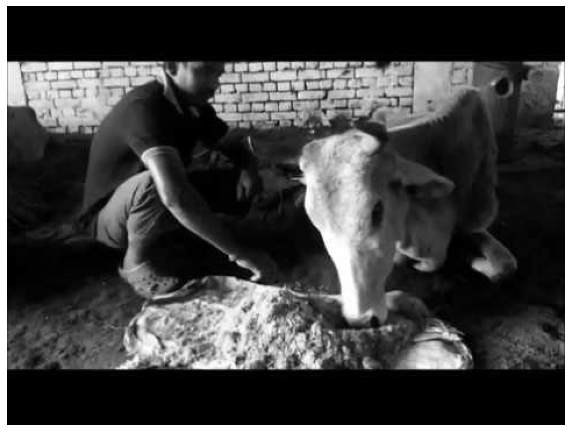

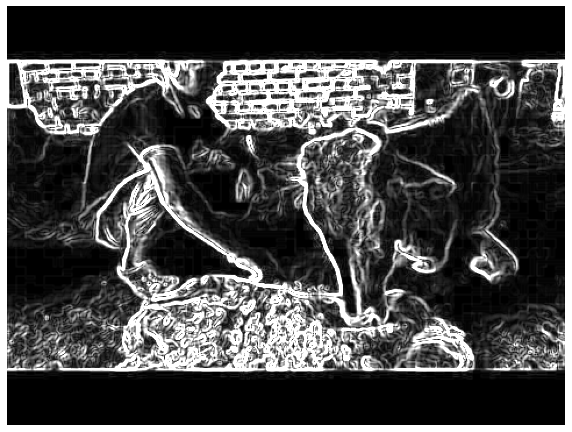

<ipython-input-2-11b6c070f3f0>:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  retroceso = np.zeros_like(M, dtype=np.int)
<ipython-input-2-11b6c070f3f0>:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtro= np.ones((r,c),

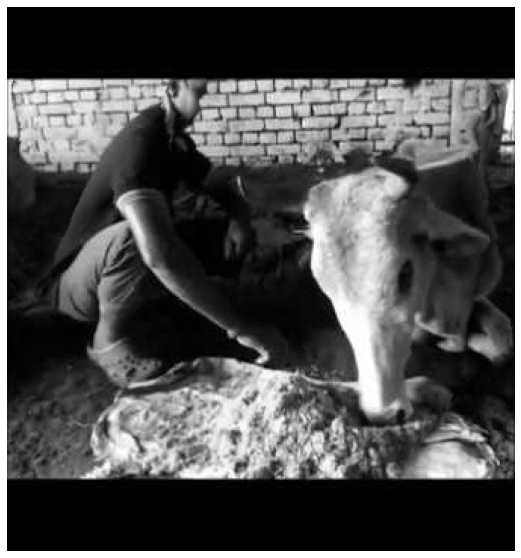

cargando... 00000004_66324407_ver1.csv como formato cvs


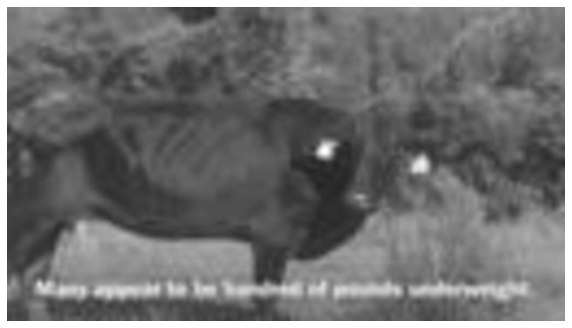

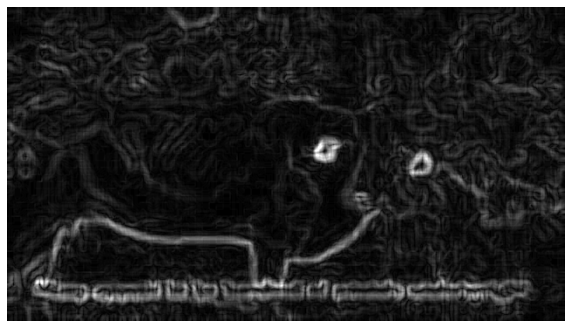

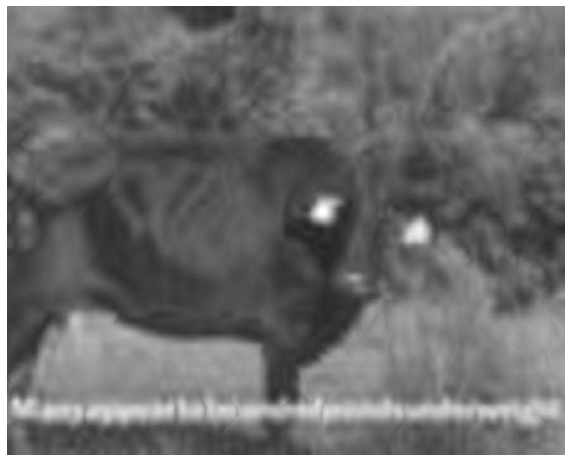

cargando... 0397768d-9068-4b65-8e3a-945c69c75d9a_1140x641.csv como formato cvs


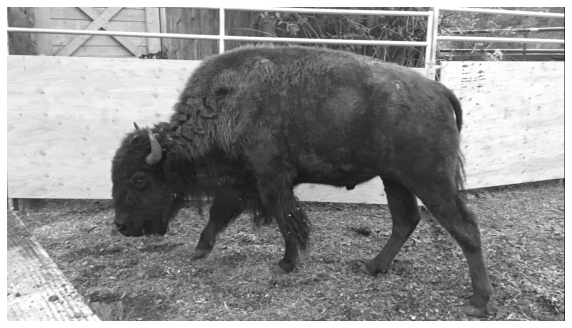

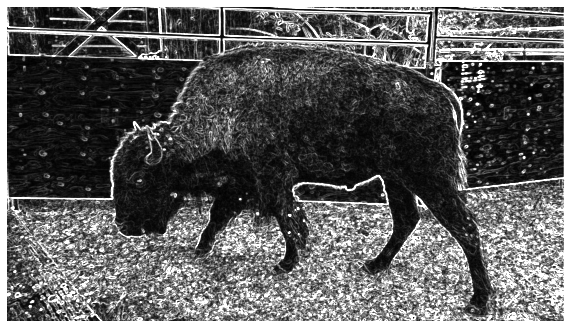

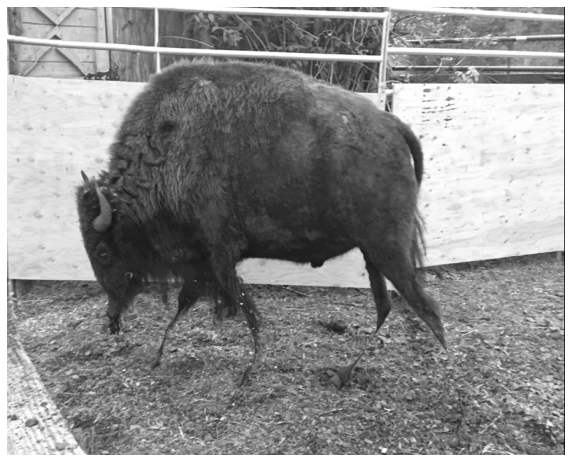

cargando... 04be43ab919b6b22d950d3b59834f4a1 (1).csv como formato cvs


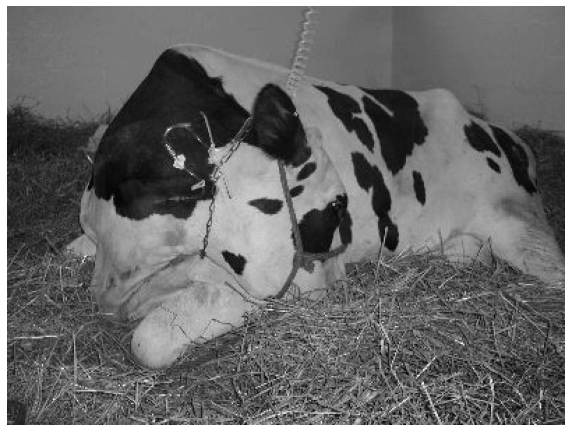

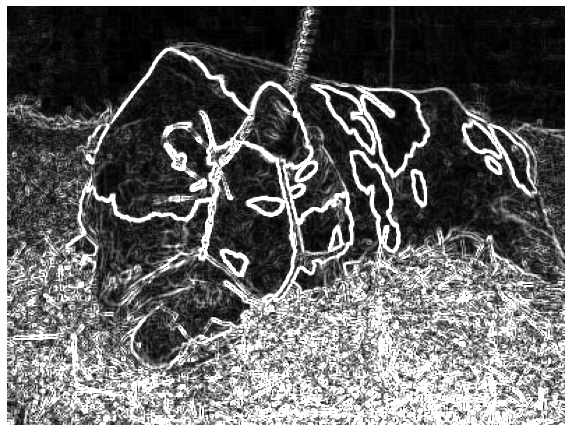

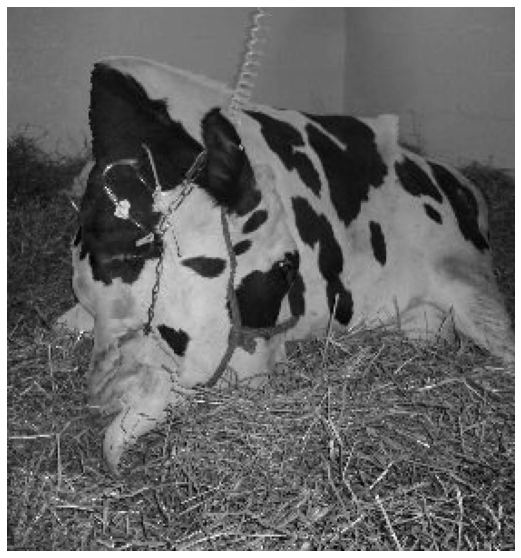

In [3]:
class Main:
    directorioActual =  espacioTrabajo.replace(string.punctuation[23], string.punctuation[14]) #Directorio actual reemplazando "\" por "/"
    lista_imagenes_Enfermos = os.listdir(directorioActual+'/codigo/datasets/csv/enfermo_csv/')
    lista_imagenes_Sanos= os.listdir(directorioActual+'/codigo/datasets/csv/sano_csv/')
    #Cargando imagenes de animales enfermos
    c=0
    for imagen in lista_imagenes_Enfermos:
        imagenEnfermo=Imagen(imagen,directorioActual+'/codigo/datasets/csv/enfermo_csv/')
        imagenEnfermo.cargarImagen()
        imagenEnfermo.mostrarImagen()
        imagenEnfermo.calculo_energia()
        plt.figure(figsize=(10, 10))
        plt.grid("off")
        plt.axis("off")
        # Recibe la matriz de cada imagen en bytes con valores de 0 a 255.
        plt.imshow(imagenEnfermo.calculo_energia(), cmap="gray", vmin=0, vmax=255)
        plt.show()
        
        imagenEnfermo.eliminandoColumnas(0.7)
        #imagenEnfermo.cortarFila(0.7)
        imagenEnfermo.mostrarImagen()
        imagenEnfermo.guardarImagenComprimida()
        
        
        c+=1
        if c==4:
            break